# Introduction

In a third world country such as Tanzania, many of its residents go to great lengths to be able to have access to clean water. Government initiatives and other entities have installed water pumps across Tanzania in order to meet this need. In areas where people must travel miles in order to get water, it's important to have pumps that are functional and any degradations in the pumps can have long-reaching negative effects on public health.

Taarifa (an open source web API) and the Tanzanian Ministry of Water have supplied data on which pumps are functional, non-functional, and pumps that are functional but need repairs. Along with these labels, each pump has with it characteristics such as region, water quality, and water extraction type.

The data and challenge is hosted at: [Link](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/)

# Goal

"Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania."

# 1. Data Introduction
## Import libraries:

In [1]:
# Math & data
import numpy as np
import pandas as pd

# Set the output of pandas dataframes to display up to 100 columns
pd.set_option('display.max_columns', 300)

# Import graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set seaborn styles
sns.set_style('darkgrid')
sns.set(font_scale = 1.5) # Sets font scale

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Misc
from datetime import datetime
from IPython.display import Image
from IPython.core.display import HTML

## Load training dataset as a Pandas dataframe:

In [2]:
path = ''

# Load training set data
training = pd.read_csv(path + 'Training set values.csv')
training_labels = pd.read_csv(path + 'Training set labels.csv')

# Display data
print('training data shape:', training.shape)
training.head(5)

training data shape: (59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


### Attributes and their descriptions:
[Link](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/)

## Descriptive statistics of numerical variables:

In [3]:
round(training.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.13,21453.13,0.00,18519.75,37061.50,55656.50,74247.00
amount_tsh,59400.0,317.65,2997.57,0.00,0.00,0.00,20.00,350000.00
gps_height,59400.0,668.30,693.12,-90.00,0.00,369.00,1319.25,2770.00
longitude,59400.0,34.08,6.57,0.00,33.09,34.91,37.18,40.35
latitude,59400.0,-5.71,2.95,-11.65,-8.54,-5.02,-3.33,-0.00
num_private,59400.0,0.47,12.24,0.00,0.00,0.00,0.00,1776.00
region_code,59400.0,15.30,17.59,1.00,5.00,12.00,17.00,99.00
district_code,59400.0,5.63,9.63,0.00,2.00,3.00,5.00,80.00
population,59400.0,179.91,471.48,0.00,0.00,25.00,215.00,30500.00
construction_year,59400.0,1300.65,951.62,0.00,0.00,1986.00,2004.00,2013.00


## Loading the testing dataset:

In [4]:
# Load testing set data
testing = pd.read_csv(path + 'Test set values.csv')

# Display data
print('testing data shape:', testing.shape)
#testing.head(5)

testing data shape: (14850, 40)


### What is the percentage of the testing set out of the whole?

In [5]:
percent_test = (testing.shape[0] / (testing.shape[0]+training.shape[0] )) * 100
print('Percentage of testing set data vs training set data:', percent_test, '%')

Percentage of testing set data vs training set data: 20.0 %


- 80% training and 20% testing data is optimal for ML algorithms.

# 2. Exploratory data analysis (EDA) on the training data
There are 3 target variables to predict:
> - 'functional'
> - 'non functional'
> - 'functional needs repair'

In [6]:
training_labels['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

## Let's check out the distribution of the variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D3E4C3940>,
      dtype=object)

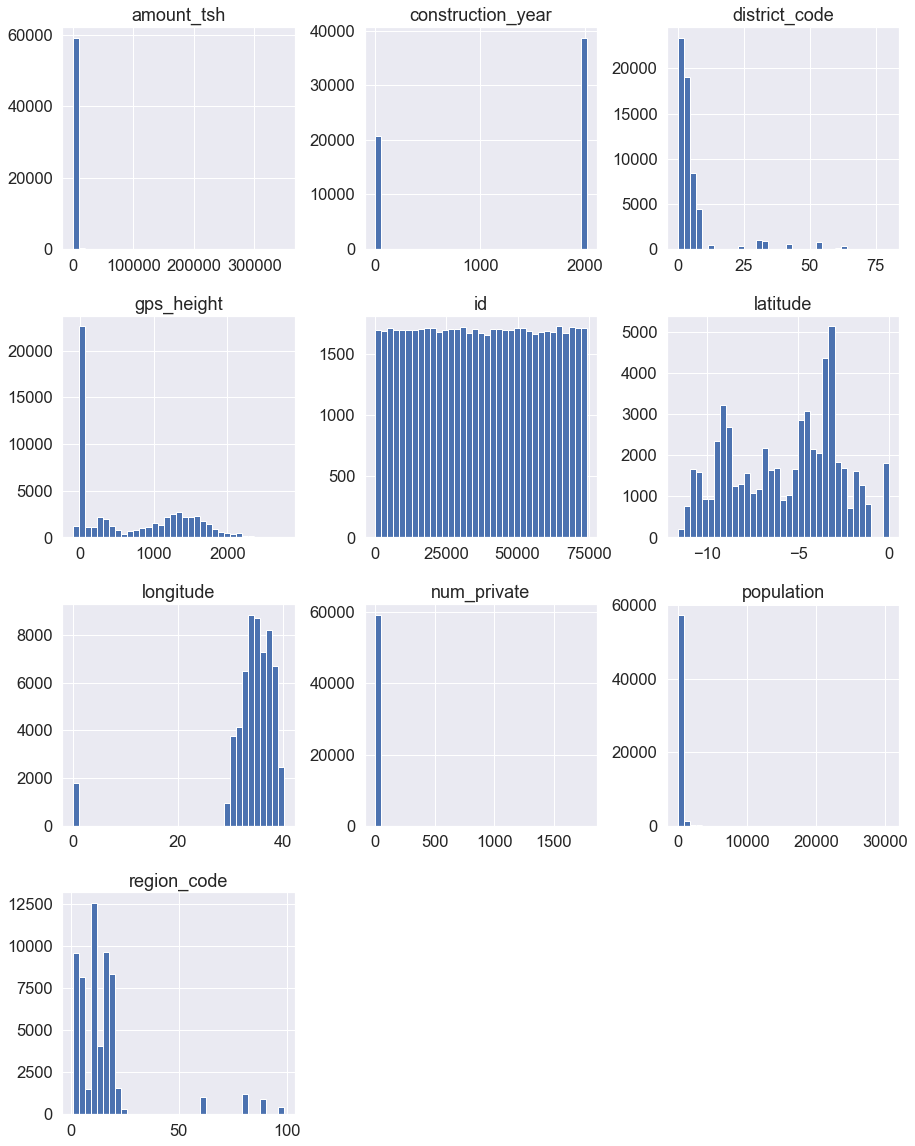

In [7]:
training.hist(figsize=(15,20), bins=35)

    Can see that num_private, population, and amount_tsh may not be useful fields since most of the data is zero.

## Examine correlation between variables:

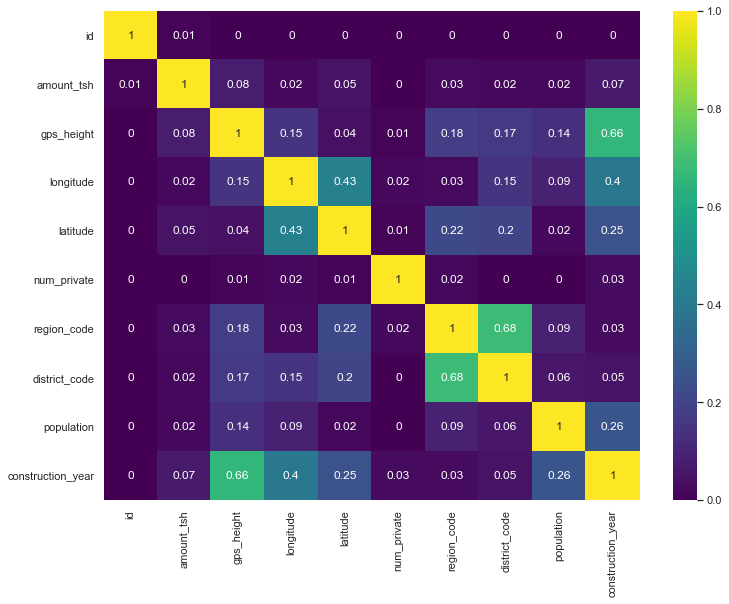

In [20]:
import seaborn as sns

# Calculate correlation matrix for the dataset
corrMat = round(abs(training.corr()), 2)

# Plot eatmap
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap(corrMat, annot=True, cmap='viridis')
ax.set_ylim(10, 0)
sns.set(font_scale=1)

Set our absolute correlation coefficient tolerance = 0.65. List of pairwise correlations above 0.65:
> - region_code & district_code
> - gps_height & construction_year

region_code & district_code will be noted as categorical instead of numerical variables so the correlations here are meaningless.
    
gps_height & district_code however are ripe for pruning. Which one though? Let's take a look at their distributions below.

## Analyze the date_recorded attribute

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

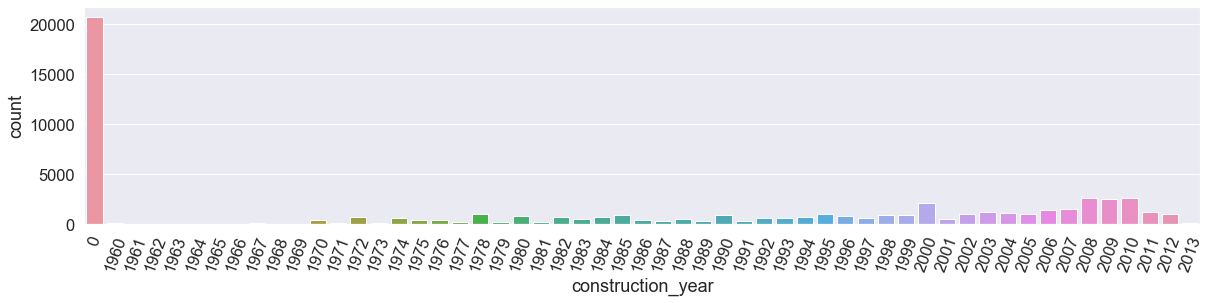

In [9]:
fig = plt.figure(figsize=(20,4))
sns.countplot(training['construction_year'])
plt.xticks(rotation=70)

Text(0, 0.5, 'count')

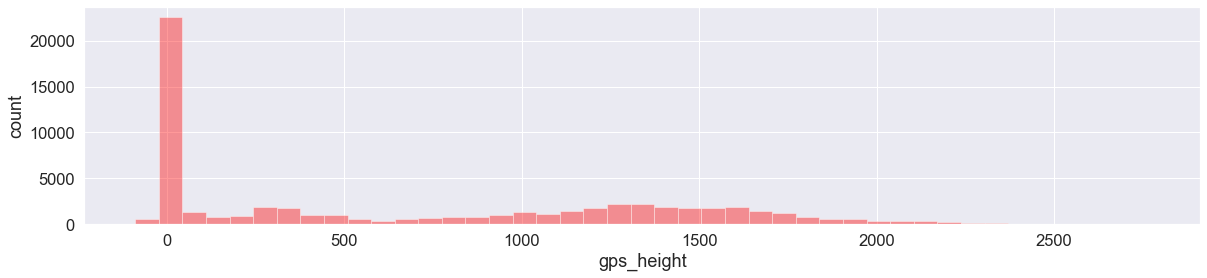

In [10]:
fig = plt.figure(figsize=(20,4))
sns.distplot(training['gps_height'], kde=False, color='red')
plt.ylabel('count')

I chose to remove gps_height since it made the classification accuracy worse.

## How balanced are the labels?

Text(0.5, 1.0, 'Target Variables')

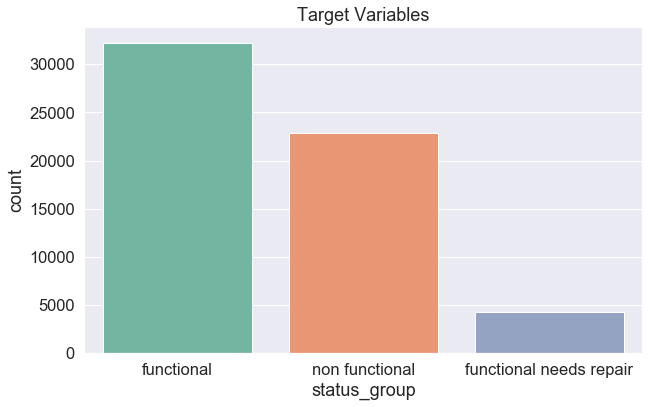

In [11]:
# Create figure
fig = plt.figure(figsize=(10, 6))
sns.countplot(training_labels['status_group'], palette='Set2')
plt.title('Target Variables')

# 3. Data Preparation (feature preprocessing & engineering)
## Are there any missing data in the dataset?

Many ML algorithms can't process null values and will need to be cleaned.

There are 3 ways to approach missing data:
> 1. Remove records with null values.
> 2. Impute null values using mean, median, or another method.
> 3. If it's in a list of categorical values, null values can be used as additional information.

In [12]:
training_na = pd.DataFrame(data = training.isnull().sum(), columns=['Number of NA'])
training_na['Percent NA'] = (training.isnull().sum()/len(training.index)*100 ).round(2)

training_na.sort_values(by=['Percent NA'], ascending=False).head(8)

,Number of NA,Percent NA
scheme_name,28166,47.42
scheme_management,3877,6.53
installer,3655,6.15
funder,3635,6.12
public_meeting,3334,5.61
permit,3056,5.14
subvillage,371,0.62
management_group,0,0.00


## Testing set missing values:

In [13]:
testing_na = pd.DataFrame(data = testing.isnull().sum(), columns=['Number of NA'])
testing_na['Percent NA'] = (testing.isnull().sum()/len(testing.index)*100 ).round(2)

testing_na.sort_values(by=['Percent NA'], ascending=False).head(8)

,Number of NA,Percent NA
scheme_name,7092,47.76
scheme_management,969,6.53
installer,877,5.91
funder,869,5.85
public_meeting,821,5.53
permit,737,4.96
subvillage,99,0.67
management_group,0,0.00


Cols with null values: funder, installer, subvillage, public_meeting, scheme_management, scheme_name, permit
    
It looks like both the training and data set have the same columns that have null values! We can apply the same function to take care of these null values.

## Plan:

1. Remove these features entirely:
> - scheme_name: nearly half of its values are NA
> - num_private: most of the values are 0
> - recorded_by: all values are GeoData Consultants Ltd
> - funder: has >1800 unique values
> - installer: has 2145 unique values
> - wpt_name: has 37400 unique values
> - subvillage: has 19,287 unique values
> - lga: has 125 unique values
> - ward: has 2092 unique values
> - extraction_type_group, management_group, payment_type, quantity_group, source_type, waterpoint_type_group: redundant

2. Convert date_recorded to a more useable feature such as days from the latest recorded date.

3. Convert categorical features to dummy variables using pd.get_dummies()

### Function that applies the preprocessing ideas above (both training and testing)

In [14]:
def preprocess_features(data):
    ### 1. Drop named features from df ###
        data = data.drop(columns=['id', 'scheme_name', 'num_private', 'recorded_by', 'funder', 'installer',
                                  'wpt_name', 'subvillage', 'lga', 'ward',
                                  'longitude', 'latitude', 'extraction_type_group', 'management_group', 
                                  'payment_type', 'quantity_group', 'source_type', 'waterpoint_type_group',
                                  'gps_height'], axis=1)

    ### 2. Create 'Days from max date' from the date_recorded feature ###
        # convert column to datetime objects
        data['date_recorded'] = pd.to_datetime(data['date_recorded'], format='%Y-%m-%d')

        # create a new field called 'Days from max date'--use instead of the date_recorded column in the analysis
        data['Days from max date'] = pd.DataFrame(data = data['date_recorded'].max() - data['date_recorded'])
        data['Days from max date'] = data['Days from max date'].dt.days   # convert datetime to int
        
        # drop the 'date_recorded' feature
        data = data.drop(columns=['date_recorded'], axis=1)
        
    ### 3. Impute values for 'public_meeting', 'scheme_management', and 'permit' ###
        data['public_meeting'] = data['public_meeting'].fillna(value=False)
        data['scheme_management'] = data['scheme_management'].fillna(value=False)
        data['permit'] = data['permit'].fillna(value=False)
        
    ### 4. Convert categorical values to dummy variables ###
        # change 'region_code' and 'district_cide' to categorical variables
        data['region_code'] = data['region_code'].astype(str)
        data['district_code'] = data['district_code'].astype(str)
        
        # convert categorical values
        data = pd.get_dummies(data)
        
        return data

In [15]:
training_clean = preprocess_features(training)
training_clean.head(5)

,amount_tsh,population,public_meeting,permit,construction_year,Days from max date,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,region_code_1,region_code_10,region_code_11,region_code_12,region_code_13,region_code_14,region_code_15,region_code_16,region_code_17,region_code_18,region_code_19,region_code_2,region_code_20,region_code_21,region_code_24,region_code_3,region_code_4,region_code_40,region_code_5,region_code_6,region_code_60,region_code_7,region_code_8,region_code_80,region_code_9,region_code_90,region_code_99,district_code_0,district_code_1,district_code_13,district_code_2,district_code_23,district_code_3,district_code_30,district_code_33,district_code_4,district_code_43,district_code_5,district_code_53,district_code_6,district_code_60,district_code_62,district_code_63,district_code_67,district_code_7,district_code_8,district_code_80,scheme_management_False,scheme_management_Company,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_never pay,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,109,True,False,1999,995,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0.0,280,False,True,2010,272,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [16]:
testing_clean = preprocess_features(testing)
testing_clean.head(5)

,amount_tsh,population,public_meeting,permit,construction_year,Days from max date,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,region_code_1,region_code_10,region_code_11,region_code_12,region_code_13,region_code_14,region_code_15,region_code_16,region_code_17,region_code_18,region_code_19,region_code_2,region_code_20,region_code_21,region_code_24,region_code_3,region_code_4,region_code_5,region_code_6,region_code_60,region_code_7,region_code_8,region_code_80,region_code_9,region_code_90,region_code_99,district_code_0,district_code_1,district_code_13,district_code_2,district_code_23,district_code_3,district_code_30,district_code_33,district_code_4,district_code_43,district_code_5,district_code_53,district_code_6,district_code_60,district_code_62,district_code_63,district_code_67,district_code_7,district_code_8,district_code_80,scheme_management_False,scheme_management_Company,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_never pay,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,0.0,321,True,True,2012,302,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0.0,300,True,True,2000,302,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [17]:
print('training_clean shape:', training_clean.shape)
print('testing_clean shape:', testing_clean.shape)

training_clean shape: (59400, 179)
testing_clean shape: (14850, 176)


## Make sure that both the training_clean and testing_clean datasets have the same columns (skip if not using the given testing data)

In [18]:
print('Differences in columns between the training and cleaning columns:')
set(training_clean.columns) - set(testing_clean.columns)

Differences in columns between the training and cleaning columns:


{'extraction_type_other - mkulima/shinyanga',
 'region_code_40',
 'scheme_management_None'}

In [19]:
#Remove the three column outlined above:
training_clean = training_clean.drop(columns=['extraction_type_other - mkulima/shinyanga',
                                            'region_code_40',
                                            'scheme_management_None'],
                                   axis=1)

print('training_clean shape:', training_clean.shape)
print('testing_clean shape:', testing_clean.shape)

training_clean shape: (59400, 176)
testing_clean shape: (14850, 176)


# 4. Random Forest Algorithm
## Use GridSearchCV
Finds the best hyperparameters to use in the random forest model. Uses cross validation to measure the performance of the model.

In [20]:
# thanks to: https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
def randomforest_param_selection(X, y, nfolds):
    bootstraps = [True, False]
    n_estimator = [10, 15]
    min_samples_splits = [2,3]
    min_samples_leafs = [1,2]
    verbosity = [0,1]
    warm_starts = [False, True]
    
    param_grid = {'bootstrap': bootstraps,
                  'n_estimators': n_estimator,
                  'min_samples_split': min_samples_splits,
                  'min_samples_leaf': min_samples_leafs,
                  'verbose': verbosity,
                  'warm_start': warm_starts}
    
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

# Run GridSearchCV with 4 folds cross validation using random forest as the estimator. Uncomment below to run the function.
#randomforest_param_selection(training_clean, training_labels['status_group'], 4)

## Initialize the random forest with the best parameters

In [21]:
# create/fit classifier
clf_forest = RandomForestClassifier(random_state=1, bootstrap=False, min_samples_leaf=2, min_samples_split=2, n_estimators=15, verbose=0, warm_start=True)
clf_forest.fit(training_clean, training_labels['status_group'])

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=True)

## Make predictions and save to a csv file

In [22]:
# Make predictions on testing set
predictions = pd.DataFrame(data=testing['id'])
predictions['status_group'] = clf_forest.predict(testing_clean)
predictions.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [23]:
# Export predictions to CSV
predictions.to_csv(path + 'predictions.csv', index=False)

## Submission details
As of 10/2/2019

In [4]:
Image(url='pics/submission_details(10-2-19).png', width=700, height=700)